# London Housing Dataset

Dataset correspondiente al mercado de casas en londres. Contiene la siguiente data relevante:
-Precio promedio mensual
-Numero de casas vendidas anual
-Crimenes mensuales cometidos

Informacion recopilada desde 1995 a 2019 por cada area.



In [25]:
import datetime as dt


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('LondonHousingData.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [8]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
sns.set()

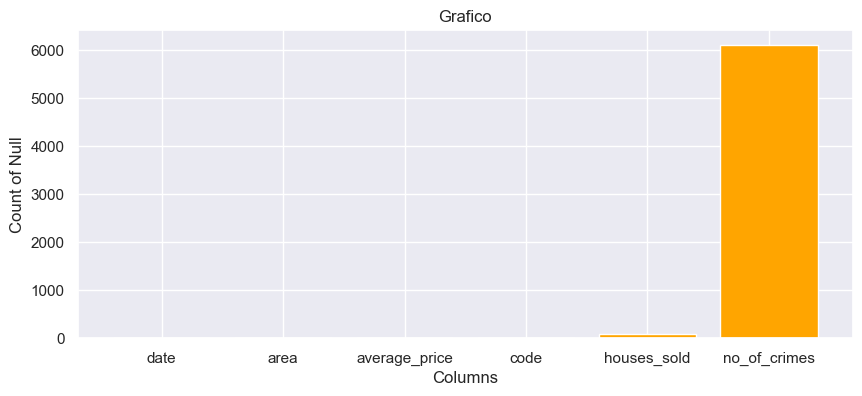

In [13]:
plt.figure(figsize=(10,4))
plt.bar(df.columns,df.isnull().sum(),color='orange')
plt.xlabel("Columns")
plt.ylabel("Count of Null")
plt.title("Grafico")
plt.show()

### Convertimos la columna Date en tipo Data-time format

In [20]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [16]:
df['date']=pd.to_datetime(df['date'])

In [17]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13549 entries, 0 to 13548
Series name: date
Non-Null Count  Dtype         
--------------  -----         
13549 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 106.0 KB


In [90]:
df.tail(100)

,date,area,average_price,code,houses_sold,no_of_crimes,Year
13449,2011-10-01,england,175171,E92000001,55412.0,NaN,2011
13450,2011-11-01,england,175200,E92000001,57594.0,NaN,2011
13451,2011-12-01,england,174812,E92000001,60991.0,NaN,2011
13452,2012-01-01,england,174179,E92000001,42125.0,NaN,2012
13453,2012-02-01,england,174161,E92000001,43023.0,NaN,2012
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019


### Agregamos una nueva columna 'Year' que contenga el año del hecho

In [27]:
df['Year']=df['date'].dt.year

In [28]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


### Agregamos una nueva columna 'Month' que contenga el mes del hecho, ubicada en 2° lugar de las columnas

In [31]:
df['Month']=df['date'].dt.month

In [35]:
df=df[['date','Month','area','average_price','code','houses_sold','no_of_crimes','Year']]

In [36]:
df.head()

,date,Month,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995


Otra forma de hacerlo es con INSERT (pd) para agregar una columna a nuestro DF 


df.insert(index,'New_column_name',new_columns_values)

In [38]:
#df.insert(1,'Month',df['date'].dt.month)

### Eliminamos las columnas recientemente creadas

In [43]:
df.drop(['Month','Year'],axis=1,inplace=True)

C:\Users\fedev\AppData\Local\Temp\ipykernel_19732\2442311267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Month','Year'],axis=1,inplace=True)


In [44]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


#### Mostrar todos los registros donde el N° de criemenes es 0 y especificar cuantos son

In [47]:
df[df['no_of_crimes']==0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [48]:
df[df['no_of_crimes']==0].count()

date             104
area             104
average_price    104
code             104
houses_sold      104
no_of_crimes     104
dtype: int64

In [49]:
len(df[df['no_of_crimes']==0])

104

### Cual es el maximo y minimo 'average_price' por cada año

In [51]:
df['Year']=df['date'].dt.year

C:\Users\fedev\AppData\Local\Temp\ipykernel_19732\100915091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['date'].dt.year


In [52]:
df

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019


In [71]:
max=df[df['area']=='england'].groupby('Year').average_price.max()
min=df[df['area']=='england'].groupby('Year').average_price.min()


In [80]:
dfa=pd.DataFrame([max,min])

In [81]:
dfa

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
average_price,53901,55755,61564,65743,75071,84191,95992,119982,138985,160330,...,177335,180129,188544,203639,219582,231922,242628,248620,250410,247355
average_price,52788,52333,55789,61659,65522,75219,84245,96215,121610,139719,...,173046,174161,176816,188265,202856,220361,231593,240428,243281,247355


### Cual es el maximo y minimo de N°deCrimenes registrados por area

In [86]:
df.groupby('area').no_of_crimes.min().sort_values(ascending=False)

area
westminster               3504.0
lambeth                   2381.0
southwark                 2267.0
newham                    2130.0
camden                    2079.0
croydon                   2031.0
islington                 1871.0
ealing                    1871.0
hackney                   1870.0
brent                     1850.0
barnet                    1703.0
lewisham                  1675.0
tower hamlets             1646.0
enfield                   1635.0
wandsworth                1582.0
waltham forest            1575.0
haringey                  1536.0
hounslow                  1529.0
greenwich                 1513.0
redbridge                 1487.0
hillingdon                1445.0
bromley                   1441.0
kensington and chelsea    1347.0
hammersmith and fulham    1323.0
barking and dagenham      1217.0
havering                  1130.0
harrow                     937.0
bexley                     860.0
merton                     819.0
sutton                     787.0
richm

In [87]:
df.groupby('area').no_of_crimes.max().sort_values(ascending=False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

### Mostrar el total de registros por cada area donde el precio promedio es menos de 100000

In [93]:
dfa=df[df['average_price']<100000]

In [99]:
dfa.groupby('area').area.count().sort_values(ascending=False)

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
waltham forest           64
bexley                   64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
bromley                  33
haringey                 33
ealing                   31
inner london             31
kingston upon thames     30
harrow         